# The Mandelbrot Set

Welcome to our Jupyter Notebook about the Mandelbrot Set.  We will be taking the complex number c at each point, and adding it to z \* z, where z starts out 0.  z = z * z + c.  Do that over and over, up to 80 times in this case.  It's a survivor's game in that most points subjected to this algorithm spiral out of the grid after a few iterations.  Others hang in there.  At the end, we image how all the points did i.e. we colorize by how many iterations each survived, before having too big a magnitude.

You may not remember how complex numbers multiply:  imagined as arrows pointing from the origin, we multiply the arrow lengths and add their angles.  Adding complex numbers is like adding two vectors, tip to tail.

What are "vectorized" operations?  That's where entire data structures act like individual objects.  Every element is affected, potentially, but without our needing to write looping code to visit every cell individually.  Lets start with a simple example...

In [1]:
import numpy as np

r1 = np.array([[1,2,3],[4,5,6]])
r2 = np.ones((2,3))  # the (2,3) is the "shape" of the array we want, 2 rows, 3 columns
r1

array([[1, 2, 3],
       [4, 5, 6]])

In [2]:
r2

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

Both these arrays have the same shape.  We may add them....

In [3]:
r1 + r2

array([[ 2.,  3.,  4.],
       [ 5.,  6.,  7.]])

In [4]:
r1 ** 2 + r2  # we may also multipy r1 by itself (not matrix multiplication) and add r2

array([[  2.,   5.,  10.],
       [ 17.,  26.,  37.]])

The function below is all about vectorizing.  Both z and output are 1000 x 1000 arrays!

In [5]:
def mandelbrot_numpy(c, maxiter):
    output = np.zeros(c.shape)
    z = np.zeros(c.shape, np.complex64)
    for it in range(maxiter):
        # not done are the numbers that haven't spiralled away by this many iterations
        notdone = np.less(z.real*z.real + z.imag*z.imag, 4.0) # magnitude test!
        output[notdone] = it  # lets keep track of how many iterations in output
        z[notdone] = z[notdone]**2 + c[notdone]  # on to the next iteration!
    output[output == maxiter-1] = 0  # these made it to the end
    return output

Lets look at a smaller slice of the complex plane to being with.  This rectangle of complex numbers starts from (-1, -1j) and ends at (1, 1j), dividing both the real and imaginary axes into three intervals marked by four tick marks.

In [6]:
r1 = np.linspace(-1, 1, 4, dtype=np.float32)
r2 = np.linspace(-1, 1, 4, dtype=np.float32)
r2_T = (r2 * 1j).reshape(4,1)
r2_T

array([[-0.-1.j        ],
       [-0.-0.33333334j],
       [ 0.+0.33333334j],
       [ 0.+1.j        ]], dtype=complex64)

By reshaping r2 into r2_T, we make it a vertical column.  Then we add.  The result is a 4x4 matrix, from (-1, -1) upper left, to (1, 1) lower right.

In [7]:
r1 + r2_T

array([[-1.00000000-1.j        , -0.33333334-1.j        ,
         0.33333334-1.j        ,  1.00000000-1.j        ],
       [-1.00000000-0.33333334j, -0.33333334-0.33333334j,
         0.33333334-0.33333334j,  1.00000000-0.33333334j],
       [-1.00000000+0.33333334j, -0.33333334+0.33333334j,
         0.33333334+0.33333334j,  1.00000000+0.33333334j],
       [-1.00000000+1.j        , -0.33333334+1.j        ,
         0.33333334+1.j        ,  1.00000000+1.j        ]], dtype=complex64)

Notice how we were able to add rectangular arrays r1 and r2_T in one line, with no loops.

In [8]:
def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width, dtype=np.float32)
    r2 = np.linspace(ymin, ymax, height, dtype=np.float32)
    c = r1 + (r2 * 1j).reshape(width,1)  # x row + each y column
    n3 = mandelbrot_numpy(c, maxiter)
    return (r1,r2,n3) 

The Python standard library has a timeit module.  Jupyter Notebooks add a layer of %magic by giving us the %timeit directive.  We're able to see how long the operation takes.

In [9]:
%timeit mandelbrot_set(-2.0,0.5,-1.25,1.25,1000,1000,80)

1 loop, best of 3: 1.32 s per loop


In [10]:
r1, r2, result = mandelbrot_set(-2.0,0.5,-1.25,1.25,1000,1000,80)

We now have the array we want to plot in result.

<IPython.core.display.Javascript object>


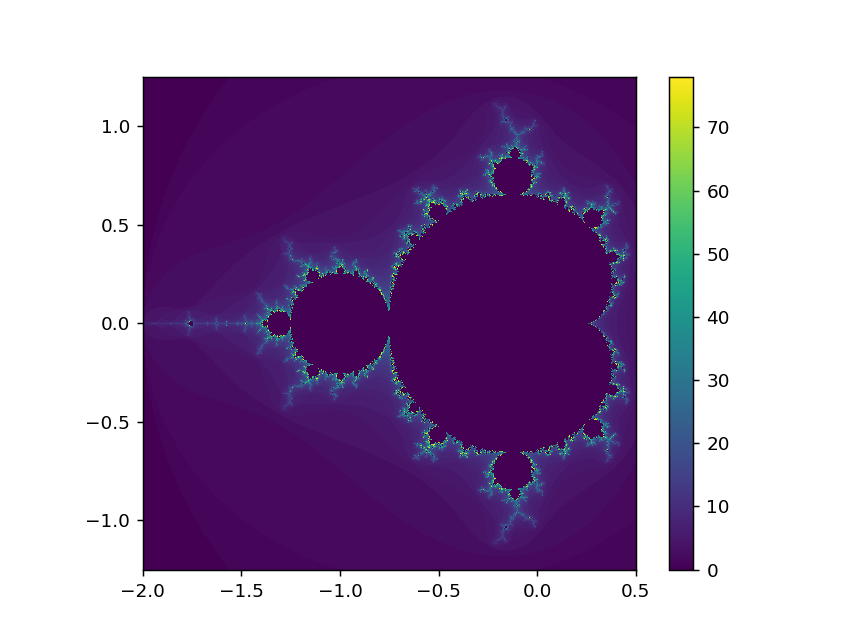

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im = ax.imshow(result, extent=[-2.0,0.5,-1.25,1.25])
fig.colorbar(im)
plt.show()

Notice how some of these points made almost to the maximum number of iterations before hitting a cut-off.  Those that never hit a cut-off get to be 0 and are considered to be members of the Mandelbrot Set.